<font size="5">**Police Officer Attdence Prediction**</font>



Author: Kai Chen

Date: April, 2020



<font size="4">**Introduction**</font>

This notebook contains my solution of analyzing the road accident safety data found at 

https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data .



- This analysis includes a model that predicts if a police officer is likely to attend an accident or not.

- The analysis focuses initially only on the accidents from the 2017 dataset.

- The notebook summarizes my initial findings. 

- This is not an exercise that develops a final solution – more of first iteration.

- The notebook describes how I might design and implement for a long term approach a data infrastructure for processing all additional data (large amount including all available years) given the desired use case above. 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-the-data" data-toc-modified-id="Getting-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting the data</a></span></li><li><span><a href="#Preprocessing-the-data" data-toc-modified-id="Preprocessing-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing the data</a></span><ul class="toc-item"><li><span><a href="#Converting-column-'Date'-into-the-python-date-time-format" data-toc-modified-id="Converting-column-'Date'-into-the-python-date-time-format-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Converting column 'Date' into the python date time format</a></span></li><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Handling missing values</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Plot-number-of-accidents-per-month" data-toc-modified-id="Plot-number-of-accidents-per-month-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot number of accidents per month</a></span></li><li><span><a href="#Show-number-of-accidents-in-each-week-day" data-toc-modified-id="Show-number-of-accidents-in-each-week-day-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Show number of accidents in each week day</a></span><ul class="toc-item"><li><span><a href="#Plot-number-of-accidents-in-the-weekdays-of-each-month" data-toc-modified-id="Plot-number-of-accidents-in-the-weekdays-of-each-month-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Plot number of accidents in the weekdays of each month</a></span></li></ul></li><li><span><a href="#How-weather-affects-the-number-of-accidents?" data-toc-modified-id="How-weather-affects-the-number-of-accidents?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>How weather affects the number of accidents?</a></span></li><li><span><a href="#Percentage-of-each-category-of-accident-severity" data-toc-modified-id="Percentage-of-each-category-of-accident-severity-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Percentage of each category of accident severity</a></span><ul class="toc-item"><li><span><a href="#Number-of-fatalities-over-the-months?" data-toc-modified-id="Number-of-fatalities-over-the-months?-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Number of fatalities over the months?</a></span></li></ul></li><li><span><a href="#Number-of-accidents-throughout-the-day" data-toc-modified-id="Number-of-accidents-throughout-the-day-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Number of accidents throughout the day</a></span><ul class="toc-item"><li><span><a href="#Number-of-accidents-through-the-time" data-toc-modified-id="Number-of-accidents-through-the-time-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Number of accidents through the time</a></span></li></ul></li><li><span><a href="#Statistics-of-Vehicles" data-toc-modified-id="Statistics-of-Vehicles-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Statistics of Vehicles</a></span><ul class="toc-item"><li><span><a href="#Sex-and-Age-Band" data-toc-modified-id="Sex-and-Age-Band-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Sex and Age Band</a></span></li><li><span><a href="#Manoeuvre" data-toc-modified-id="Manoeuvre-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Manoeuvre</a></span></li></ul></li></ul></li><li><span><a href="#Predicting-Police-Officer-Attendance" data-toc-modified-id="Predicting-Police-Officer-Attendance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predicting Police Officer Attendance</a></span><ul class="toc-item"><li><span><a href="#Merging-the-data" data-toc-modified-id="Merging-the-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Merging the data</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Defining-categorical-features" data-toc-modified-id="Defining-categorical-features-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Defining categorical features</a></span></li><li><span><a href="#Defining-numerical-features" data-toc-modified-id="Defining-numerical-features-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Defining numerical features</a></span></li></ul></li><li><span><a href="#Preparing-the-target-variable" data-toc-modified-id="Preparing-the-target-variable-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Preparing the target variable</a></span></li><li><span><a href="#Preparing-the-dataset-into-train-and-test-sets" data-toc-modified-id="Preparing-the-dataset-into-train-and-test-sets-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Preparing the dataset into train and test sets</a></span><ul class="toc-item"><li><span><a href="#Handle-missing-values" data-toc-modified-id="Handle-missing-values-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Handle missing values</a></span></li><li><span><a href="#Remove-highly-correlated-features" data-toc-modified-id="Remove-highly-correlated-features-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Remove highly correlated features</a></span></li></ul></li><li><span><a href="#Evaluating-machine-learning-models" data-toc-modified-id="Evaluating-machine-learning-models-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Evaluating machine learning models</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>Stacking</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-4.5.5"><span class="toc-item-num">4.5.5&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#SHAP-feature-analysis" data-toc-modified-id="SHAP-feature-analysis-4.5.6"><span class="toc-item-num">4.5.6&nbsp;&nbsp;</span>SHAP feature analysis</a></span></li></ul></li></ul></li><li><span><a href="#System-Design" data-toc-modified-id="System-Design-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>System Design</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [640]:
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt
import seaborn as sns

import shap


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE

import lightgbm as lgbm

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


# Getting the data

In [641]:
data_folder = 'data'
file_cas = '../{}/Cas.csv'.format(data_folder)
file_acc = '../{}/Acc.csv'.format(data_folder)
file_veh = '../{}/Veh.csv'.format(data_folder)


In [642]:
df_acc = pd.read_csv(file_acc)
df_cas = pd.read_csv(file_cas)
df_veh = pd.read_csv(file_veh)


In [643]:
df_acc.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,...,0,5,4,1,2,0,0,1,1,E01001808


In [644]:
df_acc.shape

(129982, 32)

In [645]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               129982 non-null  object 
 1   Location_Easting_OSGR                        129963 non-null  float64
 2   Location_Northing_OSGR                       129963 non-null  float64
 3   Longitude                                    129953 non-null  float64
 4   Latitude                                     129953 non-null  float64
 5   Police_Force                                 129982 non-null  int64  
 6   Accident_Severity                            129982 non-null  int64  
 7   Number_of_Vehicles                           129982 non-null  int64  
 8   Number_of_Casualties                         129982 non-null  int64  
 9   Date                                         129982 non-nul

In [646]:
df_cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2017010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,2017010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2017010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,2017010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,2017010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5


In [647]:
df_cas.shape

(170993, 16)

In [648]:
df_cas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170993 entries, 0 to 170992
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      170993 non-null  object
 1   Vehicle_Reference                   170993 non-null  int64 
 2   Casualty_Reference                  170993 non-null  int64 
 3   Casualty_Class                      170993 non-null  int64 
 4   Sex_of_Casualty                     170993 non-null  int64 
 5   Age_of_Casualty                     170993 non-null  int64 
 6   Age_Band_of_Casualty                170993 non-null  int64 
 7   Casualty_Severity                   170993 non-null  int64 
 8   Pedestrian_Location                 170993 non-null  int64 
 9   Pedestrian_Movement                 170993 non-null  int64 
 10  Car_Passenger                       170993 non-null  int64 
 11  Bus_or_Coach_Passenger              170

In [649]:
df_veh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2017010001708,1,9,0,18,0,0,0,0,0,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010001708,2,2,0,18,0,0,1,0,0,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009342,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1797,8,8,9,1,9
3,2017010009342,2,9,0,18,0,1,1,0,0,...,6,1,40,7,2204,2,12,2,1,2
4,2017010009344,1,9,0,18,0,1,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [650]:
df_veh.shape

(238926, 23)

In [651]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238926 entries, 0 to 238925
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    238926 non-null  object
 1   Vehicle_Reference                 238926 non-null  int64 
 2   Vehicle_Type                      238926 non-null  int64 
 3   Towing_and_Articulation           238926 non-null  int64 
 4   Vehicle_Manoeuvre                 238926 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  238926 non-null  int64 
 6   Junction_Location                 238926 non-null  int64 
 7   Skidding_and_Overturning          238926 non-null  int64 
 8   Hit_Object_in_Carriageway         238926 non-null  int64 
 9   Vehicle_Leaving_Carriageway       238926 non-null  int64 
 10  Hit_Object_off_Carriageway        238926 non-null  int64 
 11  1st_Point_of_Impact               238926 non-null  int64 
 12  Wa

# Preprocessing the data


## Converting column 'Date' into the python date time format


In [652]:
df_acc['Date'] = pd.to_datetime(df_acc['Date'], format="%d/%m/%Y")


In [653]:
df_acc['Date'].describe()

count                  129982
unique                    365
top       2017-12-01 00:00:00
freq                      559
first     2017-01-01 00:00:00
last      2017-12-31 00:00:00
Name: Date, dtype: object

In [654]:
df_acc[['Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    129982 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1015.6 KB


In [655]:
df_acc['Hour'] = df_acc['Time'].str[0:2]
df_acc['Hour'] = pd.to_numeric(df_acc['Hour'])
df_acc = df_acc.dropna(subset=['Hour'])
df_acc['Hour'] = df_acc['Hour'].astype('int')


- Morning Rush from 6am to 9am
- Office Hours from 9am to 4pm 
- Afternoon Rush from 4pm to 7pm 
- Evening from 7pm to 11pm 
- Night from 11pm to 6am 

**Reference**

https://www.bbc.com/news/uk-england-42917201


In [656]:

def get_time_group(hour):
    """
    This function turns the hours into daytime categories
    """
    if hour >= 6 and hour <= 9:
        return "morning rush (6-9)"
    elif hour > 9 and hour <= 16:
        return "office hours (9-16)"
    elif hour > 16 and hour <= 19:
        return "afternoon rush (16-19)"
    elif hour > 19 and hour <= 23:
        return "evening (19-23)"
    else:
        return "night (23-6)"
    
    

In [657]:
df_acc['TimeGroup'] = df_acc['Hour'].apply(get_time_group)

df_acc[['Time', 'Hour', 'TimeGroup']].head()


,Time,Hour,TimeGroup
0,03:12,3,night (23-6)
1,01:30,1,night (23-6)
2,00:30,0,night (23-6)
3,01:11,1,night (23-6)
4,01:42,1,night (23-6)


## Handling missing values

In [658]:
print('Percentage of Missing Values in Accidents:')
print(round(df_acc.isna().sum().sum()/len(df_acc), 3))


Percentage of Missing Values in Accidents:
0.056


In [659]:
print('Percentage of Missing Values (per column) in Accidents:')
print(round(df_acc.isna().sum()/len(df_acc), 3))


Percentage of Missing Values (per column) in Accidents:
Accident_Index                                 0.000
Location_Easting_OSGR                          0.000
Location_Northing_OSGR                         0.000
Longitude                                      0.000
Latitude                                       0.000
Police_Force                                   0.000
Accident_Severity                              0.000
Number_of_Vehicles                             0.000
Number_of_Casualties                           0.000
Date                                           0.000
Day_of_Week                                    0.000
Time                                           0.000
Local_Authority_(District)                     0.000
Local_Authority_(Highway)                      0.000
1st_Road_Class                                 0.000
1st_Road_Number                                0.000
Road_Type                                      0.000
Speed_limit                                

In [660]:
print('Percentage of Missing Values in Vehicles:')
print(round(df_veh.isna().sum().sum()/len(df_veh), 3))


Percentage of Missing Values in Vehicles:
0.0


In [661]:
print('Percentage of Missing Values in Casualties:')
print(round(df_cas.isna().sum().sum()/len(df_cas), 3))


Percentage of Missing Values in Casualties:
0.0


# Exploratory Data Analysis (EDA)


## Plot number of accidents per month

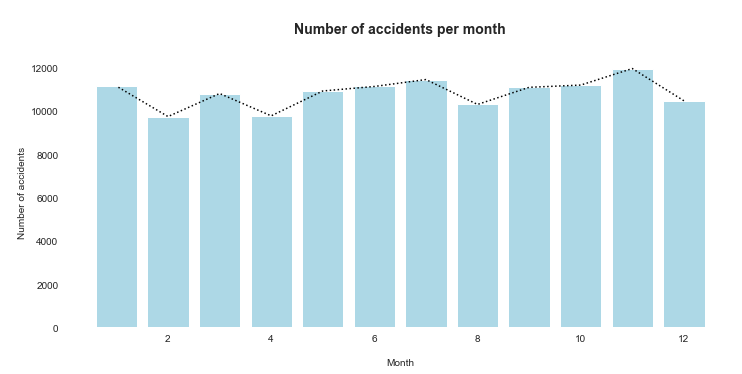

In [662]:
acc_monthly_count = df_acc['Date'].dt.month.value_counts().sort_index(ascending=False)

sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

ax.bar(acc_monthly_count.index, acc_monthly_count.values, color='lightblue')
ax.plot(acc_monthly_count, linestyle=':', color='black')
ax.set_title('\nNumber of accidents per month\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nNumber of accidents')
ax.set(xlabel='\nMonth')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


## Show number of accidents in each week day


In [663]:
acc_weekday_counts = pd.DataFrame(df_acc.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())

acc_weekday_counts.columns = ['Date', 'Count']

weekday = acc_weekday_counts['Date'].dt.day_name()
#weekday

acc_weekday_mean = pd.DataFrame(acc_weekday_counts.groupby(weekday)['Count'].mean().reset_index())
acc_weekday_mean.columns = ['Weekday', 'Mean_Accidents']
acc_weekday_mean.set_index('Weekday', inplace=True)
acc_weekday_mean


,Mean_Accidents
Weekday,
Friday,408.557692
Monday,344.923077
Saturday,331.269231
Sunday,282.547170
Thursday,380.711538
Tuesday,374.653846
Wednesday,371.500000


In [664]:
acc_weekday_mean[acc_weekday_mean['Mean_Accidents'] == acc_weekday_mean['Mean_Accidents'].max()].index


Index(['Friday'], dtype='object', name='Weekday')

In [665]:
acc_weekday_sum = pd.DataFrame(acc_weekday_counts.groupby(weekday)['Count'].sum().reset_index())
acc_weekday_sum.columns = ['Weekday', 'Sum_Accidents']
acc_weekday_sum.set_index('Weekday', inplace=True)
acc_weekday_sum


,Sum_Accidents
Weekday,
Friday,21245
Monday,17936
Saturday,17226
Sunday,14975
Thursday,19797
Tuesday,19482
Wednesday,19318


In [666]:
acc_weekday_sum[acc_weekday_sum['Sum_Accidents'] == acc_weekday_sum['Sum_Accidents'].max()].index


Index(['Friday'], dtype='object', name='Weekday')

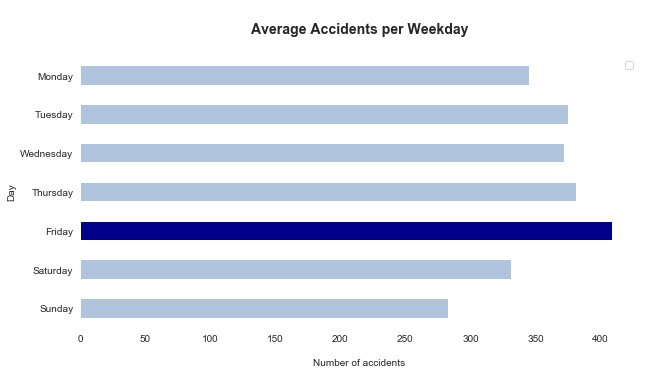

In [667]:

days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

max_acc_day = acc_weekday_mean[acc_weekday_mean['Mean_Accidents'] == acc_weekday_mean['Mean_Accidents'].max()].index.values[0]
colors = []
for day in days:
    if day == max_acc_day:
        colors.append('darkblue')
    else:
        colors.append('lightsteelblue')
        
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))

acc_weekday_mean.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of accidents', ylabel='Day')
ax.legend('')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


### Plot number of accidents in the weekdays of each month


In [668]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)


In [669]:
weekday = df_acc['Date'].dt.day_name()
month = df_acc['Date'].dt.month

acc_group = df_acc.groupby([month, weekday]).size()

acc_group = acc_group.rename_axis(['Month', 'Weekday']).unstack('Weekday').reindex(columns=days)
acc_group.style.apply(highlight_max)
#acc_group


Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Month,,,,,,,
1,1295,1298,1665,1663,1513,1905,1808
2,942,1208,1654,1478,1419,1557,1482
3,1056,1337,1943,1826,1821,1445,1377
4,1536,1685,1302,1362,1332,1380,1176
5,1183,1295,1671,1536,1887,1794,1556
6,1201,1397,1956,1932,1566,1568,1510
7,1581,1792,1642,1505,1540,1577,1812
8,1263,1230,1452,1710,1768,1682,1195
9,1184,1740,2232,1502,1483,1530,1420


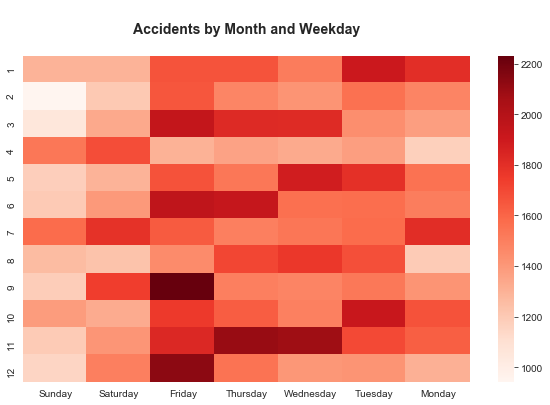

In [670]:
plt.figure(figsize=(10,6))
sns.heatmap(acc_group, cmap='Reds')
plt.title('\nAccidents by Month and Weekday\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');


## How weather affects the number of accidents?


Weather label

- 1	Fine no high winds
- 2	Raining no high winds
- 3	Snowing no high winds
- 4	Fine + high winds
- 5	Raining + high winds
- 6	Snowing + high winds
- 7	Fog or mist
- 8	Other
- 9	Unknown
- -1	Data missing or out of range!


In [671]:
df_acc[['Weather_Conditions']].describe()

,Weather_Conditions
count,129979.000000
mean,1.641488
std,1.843737
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


In [672]:
df_acc.Weather_Conditions.value_counts(normalize=True)


 1    0.805576
 2    0.110018
 9    0.035306
 8    0.020573
 4    0.009548
 5    0.008478
 3    0.004932
 7    0.004801
 6    0.000762
-1    0.000008
Name: Weather_Conditions, dtype: float64

## Percentage of each category of accident severity

accident severity

- 1	Fatal
- 2	Serious
- 3	Slight



In [673]:
df_acc['Accident_Severity'].value_counts()


3    105769
2     22534
1      1676
Name: Accident_Severity, dtype: int64

In [674]:
df_acc[['Accident_Severity']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129979 entries, 0 to 129981
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Accident_Severity  129979 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


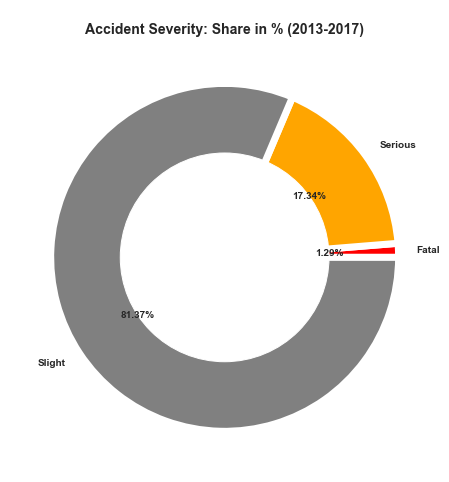

In [675]:

fatal   = df_acc.Accident_Severity.value_counts()[1]
serious = df_acc.Accident_Severity.value_counts()[2]
slight  = df_acc.Accident_Severity.value_counts()[3]

names = ['Fatal','Serious', 'Slight']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

plt.pie(x=size, labels=names, colors=['red', 'orange', 'gray'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()


### Number of fatalities over the months?


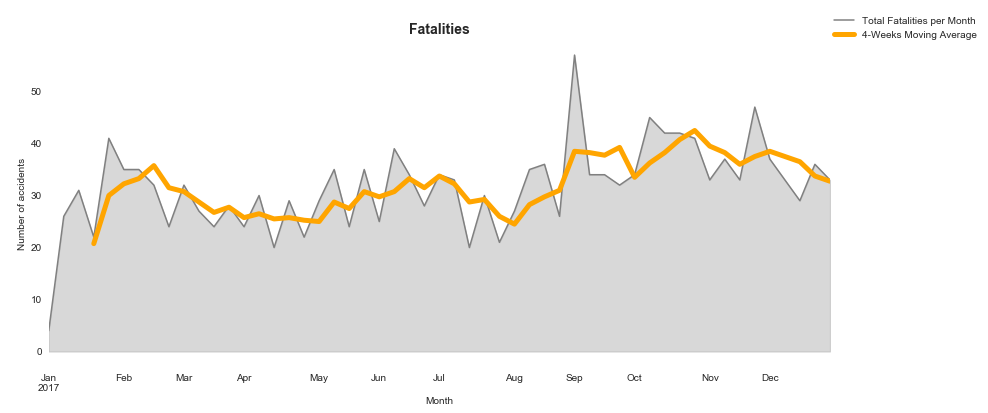

In [676]:

mask = df_acc['Accident_Severity']==1
df_weekly_fatalities = df_acc.loc[mask].set_index('Date').sort_index().resample('W').size()

sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

df_weekly_fatalities.plot(label='Total Fatalities per Month', color='gray', ax=ax)
plt.fill_between(x=df_weekly_fatalities.index, y1=df_weekly_fatalities.values, color='grey', alpha=0.3)
df_weekly_fatalities.rolling(window=4).mean().plot(color='orange', linewidth=5, label='4-Weeks Moving Average', ax=ax)

ax.set_title('\nFatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nNumber of accidents', xlabel='Month')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


## Number of accidents throughout the day

### Number of accidents through the time

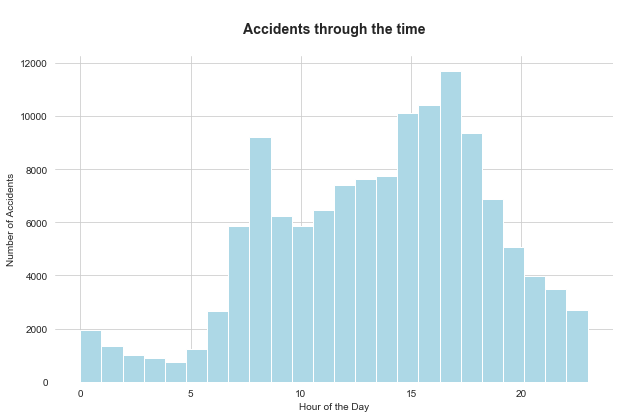

In [677]:

sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))


df_acc.Hour.hist(bins=24, ax=ax, color='lightblue')
ax.set_title('\nAccidents through the time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Number of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);


In [678]:
df_acc_counts = df_acc.groupby(['TimeGroup', 'Accident_Severity']).size()

df_acc_counts = df_acc_counts.rename_axis(['TimeGroup', 'Accident_Severity']).unstack('Accident_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
df_acc_counts.style.apply(highlight_max)


Accident_Severity,fatal,serious,slight
TimeGroup,,,
afternoon rush (16-19),295,4924,22717
evening (19-23),261,2914,12060
morning rush (6-9),222,3702,20047
night (23-6),229,1616,5339
office hours (9-16),669,9378,45606


In [679]:
df_acc_counts['sum'] = df_acc_counts.sum(axis=1)
df_acc_counts = df_acc_counts.join(df_acc_counts.div(df_acc_counts['sum'], axis=0), rsuffix=' in %')

df_acc_counts_share = df_acc_counts.drop(columns=['fatal', 'serious', 'slight', 'sum', 'sum in %'], axis=1)
df_acc_counts_share.style.apply(highlight_max)


Accident_Severity,fatal in %,serious in %,slight in %
TimeGroup,,,
afternoon rush (16-19),0.010560,0.176260,0.813180
evening (19-23),0.017132,0.191270,0.791598
morning rush (6-9),0.009261,0.154437,0.836302
night (23-6),0.031876,0.224944,0.743179
office hours (9-16),0.012021,0.168508,0.819471


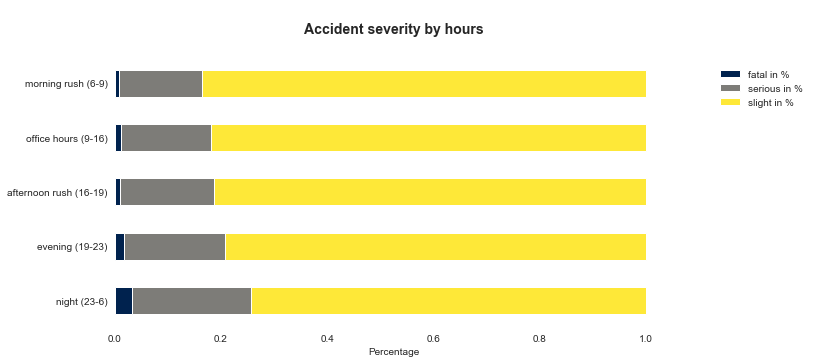

In [680]:

fig, ax = plt.subplots(figsize=(10, 5))

order = ['night (23-6)', 'evening (19-23)', 'afternoon rush (16-19)', 'office hours (9-16)', 'morning rush (6-9)']
df_acc_counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident severity by hours\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)


sns.despine(top=True, right=True, left=True, bottom=True);


## Statistics of Vehicles





### Sex and Age Band

Sex of driver
- 1	Male
- 2	Female
- 3	Not known
- -1	Data missing or out of range


Age band
- 1	0 - 5
- 2	6 - 10
- 3	11 - 15
- 4	16 - 20
- 5	21 - 25
- 6	26 - 35
- 7	36 - 45
- 8	46 - 55
- 9	56 - 65
- 10	66 - 75
- 11	Over 75
- -1	Data missing or out of range

In [681]:
def get_sex(row):
    if row['Sex_of_Driver'] == 1:
        val = 'Male'
    elif row['Sex_of_Driver'] == 2:
        val = 'Female'
    elif row['Sex_of_Driver'] == 3:
        val = 'Unknown'
    else:
        val = 'Data Missing'
    return val


def get_age_brand(row):
    age = row['Age_Band_of_Driver']
    if age == 1:
        val = '0-5'
    elif age == 2:
        val = '6-10'
    elif age == 3:
        val = '11-15'
    elif age == 4:
        val = '16-20'
    elif age == 5:
        val = '21-25'
    elif age == 6:
        val = '26-35'
    elif age == 7:
        val = '36-45'
    elif age == 8:
        val = '46-55'
    elif age == 9:
        val = '56-65'
    elif age == 10:
        val = '66-75'
    elif age == 11:
        val = 'Over 75'
    else:
        val = 'Data Missing'
    
    return val


In [682]:
df_veh['Sex_of_Driver_str'] = df_veh.apply(get_sex, axis=1)


In [683]:
df_veh.Sex_of_Driver_str.value_counts(normalize=True)


Male            0.644400
Female          0.272582
Unknown         0.083005
Data Missing    0.000013
Name: Sex_of_Driver_str, dtype: float64

In [684]:
df_veh['Age_Band_of_Driver_str'] = df_veh.apply(get_age_brand, axis=1)


In [685]:
df_veh.Age_Band_of_Driver_str.value_counts(normalize=True)


26-35           0.214083
36-45           0.168450
46-55           0.155341
Data Missing    0.116245
21-25           0.105146
56-65           0.089275
16-20           0.068754
66-75           0.044943
Over 75         0.027958
11-15           0.007860
6-10            0.001762
0-5             0.000184
Name: Age_Band_of_Driver_str, dtype: float64

In [686]:

df_drivers = df_veh.groupby(['Age_Band_of_Driver_str', 'Sex_of_Driver_str']).size().reset_index()


df_drivers.drop(df_drivers[(df_drivers['Age_Band_of_Driver_str'] == 'Data Missing') | 
                           (df_drivers['Sex_of_Driver_str'] == 'Data Missing') | 
                           (df_drivers['Sex_of_Driver_str'] == 'Unknown')].index, axis=0, inplace=True)

df_drivers.columns = ['Age_Band_of_Driver_str', 'Sex_of_Driver_str', 'Count']
df_drivers


,Age_Band_of_Driver_str,Sex_of_Driver_str,Count
0,0-5,Female,6
1,0-5,Male,38
2,11-15,Female,196
3,11-15,Male,1678
5,16-20,Female,4393
6,16-20,Male,11858
8,21-25,Female,7847
9,21-25,Male,17141
11,26-35,Female,15425
12,26-35,Male,34951


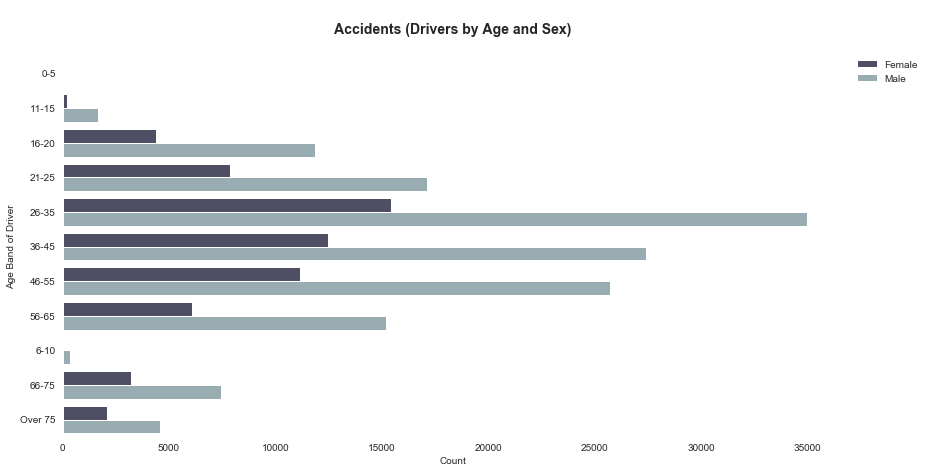

In [687]:

fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver_str', x='Count', hue='Sex_of_Driver_str', data=df_drivers, palette='bone')
ax.set_title('\nAccidents (Drivers by Age and Sex)\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)


sns.despine(top=True, right=True, left=True, bottom=True);


In [688]:
df_veh.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile', 'Sex_of_Driver_str', 'Age_Band_of_Driver_str'],
      dtype='object')

### Manoeuvre



- 1	Reversing
- 2	Parked
- 3	Waiting to go - held up
- 4	Slowing or stopping
- 5	Moving off
- 6	U-turn
- 7	Turning left
- 8	Waiting to turn left
- 9	Turning right
- 10	Waiting to turn right
- 11	Changing lane to left
- 12	Changing lane to right
- 13	Overtaking moving vehicle - offside
- 14	Overtaking static vehicle - offside
- 15	Overtaking - nearside
- 16	Going ahead left-hand bend
- 17	Going ahead right-hand bend
- 18	Going ahead other
- -1	Data missing or out of range


In [689]:
def get_manoeuvre(row):
    age = row['Vehicle_Manoeuvre']
    if age == 1:
        val = 'Reversing'
    elif age == 2:
        val = 'Parked'
    elif age == 3:
        val = 'Waiting to go - held up'
    elif age == 4:
        val = 'Slowing or stopping'
    elif age == 5:
        val = 'Moving off'
    elif age == 6:
        val = 'U-turn'
    elif age == 7:
        val = 'Turning left'
    elif age == 8:
        val = 'Waiting to turn left'
    elif age == 9:
        val = 'Turning right'
    elif age == 10:
        val = 'Waiting to turn right'
    elif age == 11:
        val = 'Changing lane to left'
    elif age == 12:
        val = 'Changing lane to right'
    elif age == 13:
        val = 'Overtaking moving vehicle - offside'
    elif age == 14:
        val = 'Overtaking static vehicle - offside'
    elif age == 15:
        val = 'Overtaking - nearside'
    elif age == 16:
        val = 'Going ahead left-hand bend'
    elif age == 17:
        val = 'Going ahead right-hand bend'
    elif age == 18:
        val = 'Going ahead other'
    else:
        val = 'Data Missing'
    
    return val


In [690]:
df_veh['Vehicle_Manoeuvre_str'] = df_veh.apply(get_manoeuvre, axis=1)


In [691]:
# prepare dataframe
df_veh_manoeuvre = df_veh.groupby('Vehicle_Manoeuvre_str').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
                                                        
#df_veh_manoeuvre = df_veh_manoeuvre[df_veh_manoeuvre.counts > 80000]
df_veh_manoeuvre


,Vehicle_Manoeuvre_str,counts
4,Going ahead other,114183
14,Turning right,22259
12,Slowing or stopping,17133
16,Waiting to go - held up,14214
6,Moving off,11688
10,Parked,9881
5,Going ahead right-hand bend,7964
13,Turning left,7866
3,Going ahead left-hand bend,6939
8,Overtaking moving vehicle - offside,4503


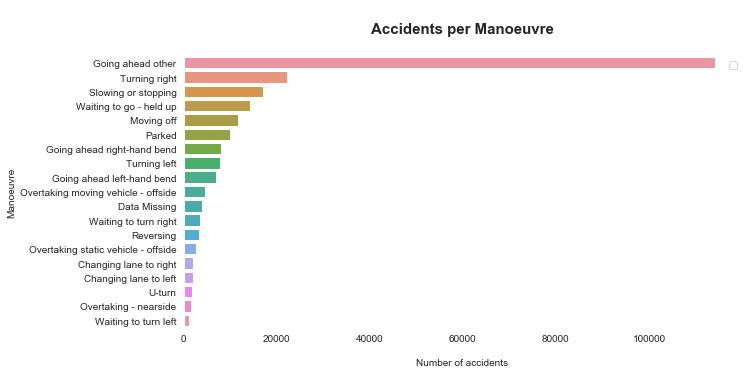

In [692]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))


sns.barplot(x="counts", y="Vehicle_Manoeuvre_str", data=df_veh_manoeuvre)

#df_veh_manoeuvre.plot(kind='barh', ax=ax)
ax.set_title('\nAccidents per Manoeuvre\n', fontsize=15, fontweight='bold')
ax.set(xlabel='\nNumber of accidents', ylabel='Manoeuvre')
ax.legend('')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


# Predicting Police Officer Attendance

In order to predict if a police officer is likely to attend an accident or not, I formulate this problem as a binary classification problem. 
Such that, given X (the features) of an accident, our objective is to predict Y (target) where Y = 1 means a police officer attends the accident, Y = 0 means no police officiers attend this accident.



## Merging the data

Merge the data sets into on dataset.


In [693]:
df_veh_acc = pd.merge(df_acc, df_veh, on='Accident_Index')
df_veh_acc_cas = pd.merge(df_veh_acc, df_cas, on='Accident_Index')


In [694]:
df_veh_acc_cas.info()    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 214097 entries, 0 to 214096
Data columns (total 74 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               214097 non-null  object        
 1   Location_Easting_OSGR                        214050 non-null  float64       
 2   Location_Northing_OSGR                       214050 non-null  float64       
 3   Longitude                                    214026 non-null  float64       
 4   Latitude                                     214026 non-null  float64       
 5   Police_Force                                 214097 non-null  int64         
 6   Accident_Severity                            214097 non-null  int64         
 7   Number_of_Vehicles                           214097 non-null  int64         
 8   Number_of_Casualties                         214097 non-null  in

In [695]:
#print(df_veh_acc_cas.isna().sum())

for col in df_veh_acc_cas.columns:
    nul_sum = df_veh_acc_cas[col].isna().sum()
    if nul_sum > 0:
        print('{} {}'.format(col, nul_sum))
        

Location_Easting_OSGR 47
Location_Northing_OSGR 47
Longitude 71
Latitude 71
LSOA_of_Accident_Location 17736


## Feature engineering


In this section, my objective is to prepare the features X.

Note there are lot of information can be used as features to train a machine learning model to 
https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

Due to the limited time, I only use the information I could understand as features.
On the onther hand, the information which I am not sure can be obtained during the prediction is not used as features.


**TODO**

- Investigate which feature is not available during the prediction time.
- Remove these features which are not available during the prediction time






- Encoding 'TimeGroup' into integer


In [696]:
le_timegroup = preprocessing.LabelEncoder()
df_veh_acc_cas['TimeGroup'] = le_time.fit_transform(df_veh_acc_cas['TimeGroup'].values)


In [697]:
df_veh_acc_cas['TimeGroup']


0         2
1         2
2         2
3         2
4         2
         ..
214092    0
214093    4
214094    4
214095    4
214096    4
Name: TimeGroup, Length: 214097, dtype: int64

* Police_Force


In [698]:
df_veh_acc_cas['Police_Force'].value_counts()


1     17660
20    15359
13    11299
6     10739
44     9866
45     9588
4      9209
97     7910
14     7715
31     6216
43     5828
10     5826
16     5730
5      5639
7      5429
22     5372
21     5099
12     4850
32     4658
33     4465
62     4397
95     4171
30     4069
55     3995
23     3884
54     3616
63     3295
3      3282
46     3149
11     3031
34     2757
60     2534
35     2374
53     1868
17     1861
61     1704
93     1156
92     1130
96     1032
91      912
94      791
98      599
48       33
Name: Police_Force, dtype: int64

* Encode 'Local_Authority_(District)'


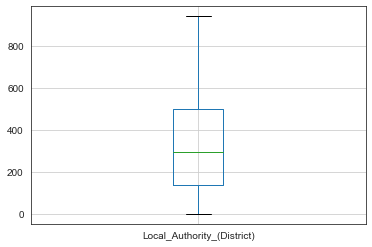

In [699]:
df_veh_acc_cas['Local_Authority_(District)'].plot.box(grid='True')


In [700]:

df_veh_acc_cas['Local_Authority_(District)_bin'] = np.digitize(df_veh_acc_cas['Local_Authority_(District)'], 
                                                               bins=[1, 100, 200, 300, 400, 500])

df_veh_acc_cas['Local_Authority_(District)_bin'] = df_veh_acc_cas['Local_Authority_(District)_bin'].astype('category')

df_veh_acc_cas['Local_Authority_(District)_bin'].value_counts().sort_index()


1    36976
2    29875
3    40960
4    39898
5    12366
6    54022
Name: Local_Authority_(District)_bin, dtype: int64

* Local_Authority_(Highway)

In [701]:
len(set(df_veh_acc_cas['Local_Authority_(Highway)'].values))


185

In [702]:
le_lah = preprocessing.LabelEncoder()
df_veh_acc_cas['Local_Authority_(Highway)_encode'] = le_lah.fit_transform(df_veh_acc_cas['Local_Authority_(Highway)'].values)


In [703]:
df_veh_acc_cas['Local_Authority_(Highway)_encode'].count


<bound method Series.count of 0         106
1         106
2         103
3         103
4          91
         ... 
214092    132
214093    132
214094    132
214095    132
214096    132
Name: Local_Authority_(Highway)_encode, Length: 214097, dtype: int64>

* 1st_Road_Class

In [704]:
df_veh_acc_cas['1st_Road_Class'].count


<bound method Series.count of 0         6
1         6
2         5
3         5
4         3
         ..
214092    3
214093    4
214094    4
214095    4
214096    4
Name: 1st_Road_Class, Length: 214097, dtype: int64>

In [705]:
len(set(df_veh_acc_cas['1st_Road_Class'].values))


6

* Road_Type

In [706]:
df_veh_acc_cas['Road_Type'].count


<bound method Series.count of 0         6
1         6
2         6
3         6
4         7
         ..
214092    6
214093    6
214094    6
214095    6
214096    6
Name: Road_Type, Length: 214097, dtype: int64>

In [707]:
set(df_veh_acc_cas['Road_Type'].values)


{1, 2, 3, 6, 7, 9}

* Junction_Detail


In [708]:
df_veh_acc_cas['Junction_Detail']


0         0
1         0
2         0
3         0
4         8
         ..
214092    0
214093    3
214094    3
214095    3
214096    3
Name: Junction_Detail, Length: 214097, dtype: int64

In [709]:
set(df_veh_acc_cas['Junction_Detail'].values)


{-1, 0, 1, 2, 3, 5, 6, 7, 8, 9}

In [710]:
df_veh_acc_cas['Junction_Detail'].value_counts()


 0    93526
 3    60023
 6    22306
 1    16638
 9     6690
 8     6226
 5     3994
 2     2222
 7     2065
-1      407
Name: Junction_Detail, dtype: int64

* Junction_Control   


In [711]:
set(df_veh_acc_cas['Junction_Control'].values)


{-1, 1, 2, 3, 4}

In [712]:

df_veh_acc_cas['Junction_Control'].value_counts()


-1    95169
 4    94839
 2    22332
 3     1283
 1      474
Name: Junction_Control, dtype: int64

* 2nd_Road_Class


In [713]:
df_veh_acc_cas['2nd_Road_Class'].value_counts()


-1    93729
 6    83166
 3    18981
 4     8577
 5     7507
 1     1837
 2      300
Name: 2nd_Road_Class, dtype: int64

* Pedestrian_Crossing-Human_Control

In [714]:
df_veh_acc_cas['Pedestrian_Crossing-Human_Control'].value_counts()


 0    209924
-1      2357
 2      1201
 1       615
Name: Pedestrian_Crossing-Human_Control, dtype: int64

* Pedestrian_Crossing-Physical_Facilities

In [715]:
df_veh_acc_cas['Pedestrian_Crossing-Physical_Facilities'].value_counts()


 0    178796
 5     13830
 4     10167
 8      4590
 1      4236
-1      2177
 7       301
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

* Light_Conditions

In [716]:
df_veh_acc_cas['Light_Conditions'].value_counts()


 1    151682
 4     43744
 6     11969
 7      5313
 5      1387
-1         2
Name: Light_Conditions, dtype: int64

* Weather_Conditions


In [717]:
df_veh_acc_cas['Weather_Conditions'].value_counts()


 1    173173
 2     24598
 9      5640
 8      4223
 4      2265
 5      1857
 7      1095
 3      1059
 6       185
-1         2
Name: Weather_Conditions, dtype: int64

* Road_Surface_Conditions 

In [718]:
df_veh_acc_cas['Road_Surface_Conditions'].value_counts()


 1    149856
 2     58189
 4      3548
-1      1476
 3       846
 5       182
Name: Road_Surface_Conditions, dtype: int64

* Special_Conditions_at_Site

In [719]:
df_veh_acc_cas['Special_Conditions_at_Site'].value_counts()


 0    207532
 4      2845
-1      1596
 7       515
 6       460
 1       457
 3       335
 5       270
 2        87
Name: Special_Conditions_at_Site, dtype: int64

* Carriageway_Hazards


In [720]:
df_veh_acc_cas['Carriageway_Hazards'].value_counts()


 0    208924
 2      1796
-1      1462
 7       622
 3       597
 1       460
 6       236
Name: Carriageway_Hazards, dtype: int64

* Urban_or_Rural_Area

In [721]:
df_veh_acc_cas['Urban_or_Rural_Area'].value_counts()


1    131202
2     82871
3        24
Name: Urban_or_Rural_Area, dtype: int64

* LSOA_of_Accident_Location

In [722]:
df_veh_acc_cas['LSOA_of_Accident_Location'].value_counts()


E01033640    229
E01030815    185
E01018648    183
E01030458    169
E01030814    168
            ... 
E01010327      1
E01026257      1
E01025355      1
E01028526      1
E01004426      1
Name: LSOA_of_Accident_Location, Length: 21474, dtype: int64

In [723]:
le_lal = preprocessing.LabelEncoder()
df_veh_acc_cas['LSOA_of_Accident_Location_encode'] = le_lal.fit_transform(df_veh_acc_cas['LSOA_of_Accident_Location'].astype(str).values)



* Vehicle_Type

In [724]:
df_veh_acc_cas['Vehicle_Type'].value_counts()


 9     161483
 1      12155
 19     10902
 3       5011
 8       4411
 5       4279
 11      4030
 21      3846
 4       1462
 90      1452
 2       1204
 20      1131
 98       950
 10       576
 17       447
 97       269
-1        176
 22       167
 16        79
 18        34
 23        33
Name: Vehicle_Type, dtype: int64

* Towing_and_Articulation

In [725]:
df_veh_acc_cas['Towing_and_Articulation'].value_counts()


 0    208832
 1      2102
-1      2079
 4       645
 5       227
 3       148
 2        64
Name: Towing_and_Articulation, dtype: int64

* Vehicle_Location-Restricted_Lane

In [726]:
df_veh_acc_cas['Vehicle_Location-Restricted_Lane'].value_counts()


 0    206884
-1      2371
 9      2187
 2       777
 6       595
 4       538
 8       244
 5       232
 7       108
 1        96
 3        65
Name: Vehicle_Location-Restricted_Lane, dtype: int64

* Junction_Location

In [727]:
df_veh_acc_cas['Junction_Location'].value_counts()


 0    93535
 1    46743
 8    37771
 2    10521
 6     9589
 4     5395
 5     5166
 3     2914
-1     1713
 7      750
Name: Junction_Location, dtype: int64

* Skidding_and_Overturning

In [728]:
df_veh_acc_cas['Skidding_and_Overturning'].value_counts()


 0    186946
 1     16263
 5      4193
 2      3855
-1      2717
 3        65
 4        58
Name: Skidding_and_Overturning, dtype: int64

* Hit_Object_in_Carriageway


In [729]:
df_veh_acc_cas['Hit_Object_in_Carriageway'].value_counts()


 0     201642
 10      3659
 4       3262
-1       2651
 7       1169
 11       604
 12       218
 9        201
 1        190
 8        185
 6        151
 2        143
 5         22
Name: Hit_Object_in_Carriageway, dtype: int64

* Vehicle_Leaving_Carriageway


In [730]:
df_veh_acc_cas['Vehicle_Leaving_Carriageway'].value_counts()


 0    185751
 1     13630
 7      6883
-1      2543
 2      1658
 4      1005
 3       877
 8       859
 5       643
 6       248
Name: Vehicle_Leaving_Carriageway, dtype: int64

* Hit_Object_off_Carriageway

In [731]:
df_veh_acc_cas['Hit_Object_off_Carriageway'].value_counts()


 0     195714
 11      3263
 10      2993
 4       2607
-1       1972
 1       1758
 9       1527
 6       1261
 2       1187
 7       1173
 3        509
 5        121
 8         12
Name: Hit_Object_off_Carriageway, dtype: int64

* 1st_Point_of_Impact

In [732]:
df_veh_acc_cas['1st_Point_of_Impact'].value_counts()


 1    109019
 2     39435
 3     27958
 4     24084
 0     11549
-1      2052
Name: 1st_Point_of_Impact, dtype: int64

* Was_Vehicle_Left_Hand_Drive?

In [733]:
df_veh_acc_cas['Was_Vehicle_Left_Hand_Drive?'].value_counts()


 1    209422
-1      3470
 2      1205
Name: Was_Vehicle_Left_Hand_Drive?, dtype: int64

* Journey_Purpose_of_Driver


In [734]:
df_veh_acc_cas['Journey_Purpose_of_Driver'].value_counts()


 6    137606
 1     32450
 2     22141
 5     18786
 3      2483
 4       610
-1        21
Name: Journey_Purpose_of_Driver, dtype: int64

* Propulsion_Code

In [735]:
df_veh_acc_cas['Propulsion_Code'].value_counts()


 1     90930
 2     78569
-1     42001
 8      2166
 3       167
 7       156
 12       57
 5        27
 6        23
 10        1
Name: Propulsion_Code, dtype: int64

* Driver_IMD_Decile

In [736]:
df_veh_acc_cas['Driver_IMD_Decile'].value_counts()


-1     82109
 1     17826
 2     15267
 3     13963
 5     13063
 4     12945
 6     12444
 7     12329
 8     12181
 9     11787
 10    10183
Name: Driver_IMD_Decile, dtype: int64

* Driver_Home_Area_Type


In [737]:
df_veh_acc_cas['Driver_Home_Area_Type'].value_counts()


 1    122103
-1     58301
 3     19113
 2     14580
Name: Driver_Home_Area_Type, dtype: int64

* Vehicle_IMD_Decile


In [738]:
df_veh_acc_cas['Vehicle_IMD_Decile'].value_counts()


-1     82109
 1     17826
 2     15267
 3     13963
 5     13063
 4     12945
 6     12444
 7     12329
 8     12181
 9     11787
 10    10183
Name: Vehicle_IMD_Decile, dtype: int64

* Vehicle_Reference_y


In [739]:
df_veh_acc_cas['Vehicle_Reference_y'].value_counts()


1      100386
2       98990
3       10790
4        2433
5         724
6         339
7         203
8         118
10         35
9          35
14         15
13         15
11         11
22          2
101         1
Name: Vehicle_Reference_y, dtype: int64

* Casualty_Reference


In [740]:
df_veh_acc_cas['Casualty_Reference'].value_counts()


1     151169
2      40017
3      13874
4       5367
5       2015
6        844
7        338
8        168
9         74
10        54
11        34
12        15
13        15
14        13
21         9
15         7
27         5
25         5
24         5
23         5
22         5
20         5
19         5
18         5
17         5
16         5
26         5
31         3
34         3
33         3
32         3
28         3
30         3
29         3
41         1
35         1
36         1
37         1
38         1
39         1
40         1
42         1
Name: Casualty_Reference, dtype: int64

* Casualty_Class


In [741]:
df_veh_acc_cas['Casualty_Class'].value_counts()


1    146094
2     51582
3     16421
Name: Casualty_Class, dtype: int64

* Sex_of_Casualty


In [742]:
df_veh_acc_cas['Sex_of_Casualty'].value_counts()


 1    125156
 2     88928
-1        13
Name: Sex_of_Casualty, dtype: int64

* Age_of_Casualty


In [743]:
df_veh_acc_cas['Age_of_Casualty'].value_counts()


25    5571
23    5336
21    5219
18    5179
20    5151
      ... 
95      39
94      37
96      27
97       8
98       4
Name: Age_of_Casualty, Length: 100, dtype: int64

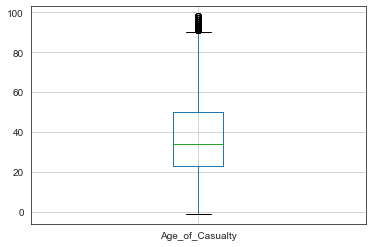

In [744]:
df_veh_acc_cas[['Age_of_Casualty']].plot.box(grid='True')
   

In [745]:
df_veh_acc_cas['Age_of_Casualty'].value_counts()


25    5571
23    5336
21    5219
18    5179
20    5151
      ... 
95      39
94      37
96      27
97       8
98       4
Name: Age_of_Casualty, Length: 100, dtype: int64

In [746]:
df_veh_acc_cas['Age_of_Casualty_bin'] = np.digitize(df_veh_acc_cas['Age_of_Casualty'], bins=[0, 16, 30, 40, 50, 60, 70])

df_veh_acc_cas['Age_of_Casualty_bin'] = df_veh_acc_cas['Age_of_Casualty_bin'].astype('category')

df_veh_acc_cas['Age_of_Casualty_bin'].value_counts().sort_index()


0     2507
1    18148
2    67559
3    38049
4    31934
5    27628
6    14362
7    13910
Name: Age_of_Casualty_bin, dtype: int64

* Age_Band_of_Casualty


In [747]:
df_veh_acc_cas['Age_Band_of_Casualty'].value_counts()


 6     44050
 7     32162
 8     31669
 5     26297
 4     21845
 9     18843
 10    10517
 3      8606
 11     8059
 2      5709
 1      3833
-1      2507
Name: Age_Band_of_Casualty, dtype: int64

* Casualty_Severity


In [748]:
df_veh_acc_cas['Casualty_Severity'].value_counts()


3    182544
2     29183
1      2370
Name: Casualty_Severity, dtype: int64

* Pedestrian_Location


In [749]:
df_veh_acc_cas['Pedestrian_Location'].value_counts()


0     197676
5       6901
1       2189
6       2006
9       1951
10      1478
4       1056
8        632
7         94
2         71
3         43
Name: Pedestrian_Location, dtype: int64

* Pedestrian_Movement


In [750]:
df_veh_acc_cas['Pedestrian_Movement'].value_counts()


0    197676
1      5068
9      4536
3      3146
2      1090
5       931
4       805
8       416
7       259
6       170
Name: Pedestrian_Movement, dtype: int64

* Car_Passenger


In [751]:
df_veh_acc_cas['Car_Passenger'].value_counts()


 0    168304
 1     28709
 2     16531
-1       553
Name: Car_Passenger, dtype: int64

* Bus_or_Coach_Passenger


In [752]:
df_veh_acc_cas['Bus_or_Coach_Passenger'].value_counts()


 0    210580
 4      2491
 3       736
 2       154
 1        98
-1        38
Name: Bus_or_Coach_Passenger, dtype: int64

* Pedestrian_Road_Maintenance_Worker


In [753]:
df_veh_acc_cas['Pedestrian_Road_Maintenance_Worker'].value_counts()


 0    210731
 2      3200
 1        92
-1        74
Name: Pedestrian_Road_Maintenance_Worker, dtype: int64

* Casualty_Type


In [754]:
df_veh_acc_cas['Casualty_Type'].value_counts()


 9     137572
 1      22631
 0      16421
 3       8283
 5       6871
 19      6111
 11      3883
 8       3654
 4       2427
 2       1961
 21      1153
 90       975
 10       558
 20       494
 97       269
 98       260
 22       235
 16       138
 17       113
 23        56
 18        28
-1          4
Name: Casualty_Type, dtype: int64

* Casualty_Home_Area_Type


In [755]:
df_veh_acc_cas['Casualty_Home_Area_Type'].value_counts()


 1    134534
-1     45352
 3     18965
 2     15246
Name: Casualty_Home_Area_Type, dtype: int64

* Casualty_IMD_Decile


In [756]:
df_veh_acc_cas['Casualty_IMD_Decile'].value_counts()


-1     70420
 1     20225
 2     17412
 3     15923
 4     14439
 5     14148
 6     12943
 7     12844
 8     12741
 9     12371
 10    10631
Name: Casualty_IMD_Decile, dtype: int64

* Speed_limit

In [757]:
df_veh_acc_cas['Speed_limit'].value_counts()


30    120702
60     32634
40     20645
70     19731
50     11888
20      8497
Name: Speed_limit, dtype: int64

* Date

In [758]:
df_veh_acc_cas['Month'] = df_veh_acc_cas['Date'].dt.month


In [759]:
df_veh_acc_cas['Month'].value_counts()

11    22962
10    22105
12    19713
9     18924
7     17566
3     17058
1     16999
6     16869
8     16508
5     15975
2     14948
4     14470
Name: Month, dtype: int64

* Day_of_Week

In [760]:
df_veh_acc_cas['Day_of_Week'].value_counts()


6    35089
5    32135
4    31108
3    31041
7    29387
2    29183
1    26154
Name: Day_of_Week, dtype: int64

### Defining categorical features

Pleas note I only use the features I could understand and I think it would be available during prediction time.


In [761]:
"""
Month
Day_of_Week
TimeGroup
Police_Force
Local_Authority_(District)
Local_Authority_(District)_bin
Local_Authority_(Highway)
Local_Authority_(Highway)_encode
1st_Road_Class
Road_Type
Junction_Detail
Junction_Control
2nd_Road_Class
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
LSOA_of_Accident_Location
LSOA_of_Accident_Location_encode
Vehicle_Reference
Vehicle_Type
Towing_and_Articulation
Vehicle_Location-Restricted_Lane
Junction_Location
Skidding_and_Overturning
Hit_Object_in_Carriageway
Vehicle_Leaving_Carriageway
Hit_Object_off_Carriageway
1st_Point_of_Impact
Was_Vehicle_Left_Hand_Drive?
Journey_Purpose_of_Driver
Propulsion_Code
Driver_IMD_Decile
Driver_Home_Area_Type
Vehicle_IMD_Decile
Vehicle_Reference_y
Casualty_Reference
Casualty_Class
Sex_of_Casualty
Age_of_Casualty
Age_of_Casualty_bin
Casualty_Severity
Pedestrian_Location
Pedestrian_Movement
Car_Passenger
Bus_or_Coach_Passenger
Pedestrian_Road_Maintenance_Worker
Casualty_Type
Casualty_Home_Area_Type
Casualty_IMD_Decile
Speed_limit
"""

cat_cols = ['Month',
            'Day_of_Week',
            'TimeGroup', 
            'Local_Authority_(District)_bin',
            'Local_Authority_(Highway)_encode',
            '1st_Road_Class',
            'Road_Type',
            'Junction_Detail',
            'Junction_Control',
            'Junction_Location',
            '2nd_Road_Class',
            'Pedestrian_Crossing-Human_Control',
            'Pedestrian_Crossing-Physical_Facilities',
            'Light_Conditions',
            'Weather_Conditions',
            'Road_Surface_Conditions',
            'Special_Conditions_at_Site',
            'Carriageway_Hazards',
            'Urban_or_Rural_Area',
            'LSOA_of_Accident_Location_encode',
            'Vehicle_Type',
            'Towing_and_Articulation',
            'Vehicle_Location-Restricted_Lane',
            'Skidding_and_Overturning',
            'Hit_Object_in_Carriageway',
            'Vehicle_Leaving_Carriageway',
            'Hit_Object_off_Carriageway',
            '1st_Point_of_Impact',
            'Propulsion_Code',
            'Vehicle_IMD_Decile',
            'Vehicle_Reference_y',
            'Pedestrian_Location',
            'Pedestrian_Movement',
            'Car_Passenger',
            'Bus_or_Coach_Passenger',
            'Pedestrian_Road_Maintenance_Worker',
            'Accident_Severity', 
            'Speed_limit', 
            'Age_Band_of_Driver', 
            'Sex_of_Driver', 
            'Vehicle_Manoeuvre',
           ]

for col in cat_cols:    
    df_veh_acc_cas[col] = df_veh_acc_cas[col].astype('category')
    


### Defining numerical features


**TODO**

- Investigate which feature is not available during the prediction time.
- Remove these features which are not available during the prediction time


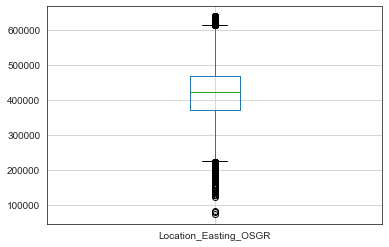

In [762]:
#df_veh_acc_cas['Location_Easting_OSGR'].value_counts()
df_veh_acc_cas[['Location_Easting_OSGR']].plot.box(grid='True')


In [763]:
df_veh_acc_cas['Location_Easting_OSGR'].isnull().sum()

47

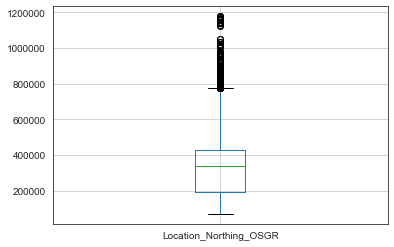

In [764]:
df_veh_acc_cas[['Location_Northing_OSGR']].plot.box(grid='True')


In [765]:
df_veh_acc_cas['Location_Northing_OSGR'].isnull().sum()


47

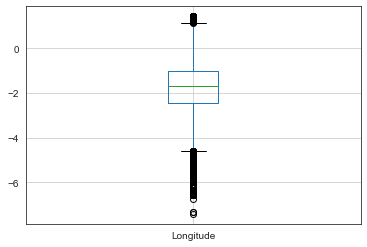

In [766]:
df_veh_acc_cas[['Longitude']].plot.box(grid='True')


In [767]:
df_veh_acc_cas['Longitude'].isnull().sum()


71

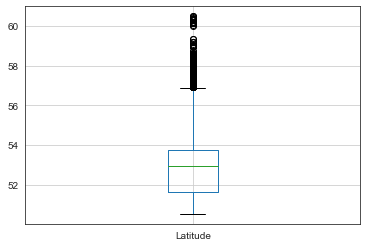

In [768]:
df_veh_acc_cas[['Latitude']].plot.box(grid='True')


In [769]:
df_veh_acc_cas['Latitude'].isnull().sum()


71

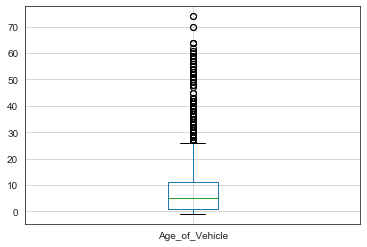

In [770]:
df_veh_acc_cas[['Age_of_Vehicle']].plot.box(grid='True')


In [771]:
df_veh_acc_cas['Age_of_Vehicle'].isnull().sum()


0

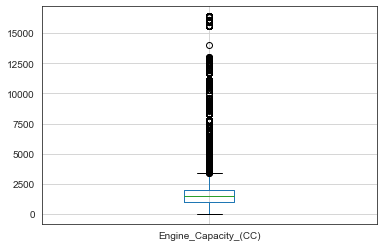

In [772]:
df_veh_acc_cas[['Engine_Capacity_(CC)']].plot.box(grid='True')


In [773]:
df_veh_acc_cas['Engine_Capacity_(CC)'].isnull().sum()


0

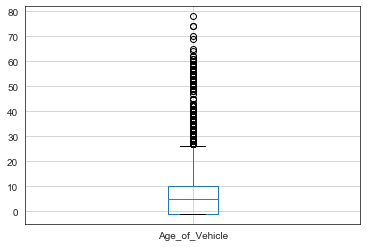

In [774]:
df_veh_acc[['Age_of_Vehicle']].plot.box(grid='True')
    

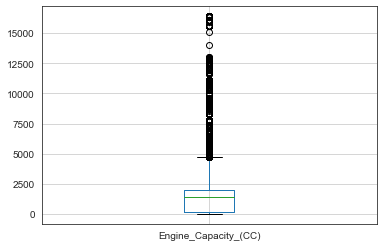

In [775]:

df_veh_acc[['Engine_Capacity_(CC)']].plot.box(grid='True')
   

In [776]:
df_veh_acc['Age_of_Vehicle'].describe()


count    205624.000000
mean          5.715033
std           5.985304
min          -1.000000
25%          -1.000000
50%           5.000000
75%          10.000000
max          78.000000
Name: Age_of_Vehicle, dtype: float64

In [777]:
len(set(df_veh_acc['Age_of_Vehicle'].values))


67

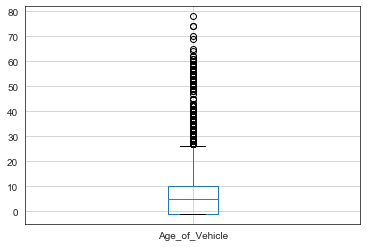

In [778]:
df_veh_acc[['Age_of_Vehicle']].plot.box(grid='True')


In [779]:

num_cols = ['Location_Easting_OSGR',
            'Location_Northing_OSGR',
            'Longitude',
            'Latitude',
            'Age_of_Vehicle', 
            'Engine_Capacity_(CC)',
           ]


In [780]:
"""
# Encoding the 'age of vehicle' into bins

age_of_vehicle_bins = {1: '1 to <2 years', 
                       2: '2 to <5 years', 
                       3: '5 to <10 years', 
                       4: '>=10 years'}

df_veh_acc_cas['Age_of_Vehicle_bin'] = np.digitize(df_veh_acc['Age_of_Vehicle'], bins=[1,2,5,10])
df_veh_acc_cas['Age_of_Vehicle_bin'] = df_veh_acc['Age_of_Vehicle_bin'].astype('category')
df_veh_acc_cas['Age_of_Vehicle_bin'].value_counts().sort_index()
"""

"\n# Encoding the 'age of vehicle' into bins\n\nage_of_vehicle_bins = {1: '1 to <2 years', \n                       2: '2 to <5 years', \n                       3: '5 to <10 years', \n                       4: '>=10 years'}\n\ndf_veh_acc_cas['Age_of_Vehicle_bin'] = np.digitize(df_veh_acc['Age_of_Vehicle'], bins=[1,2,5,10])\ndf_veh_acc_cas['Age_of_Vehicle_bin'] = df_veh_acc['Age_of_Vehicle_bin'].astype('category')\ndf_veh_acc_cas['Age_of_Vehicle_bin'].value_counts().sort_index()\n"

## Preparing the target variable

- 1	Yes
- 2	No
- 3	No - accident was reported using a self completion  form (self rep only)


In [781]:
#df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident'].describe()
#df_veh_acc[['Did_Police_Officer_Attend_Scene_of_Accident']].plot.box(grid='True')

df_veh_acc_cas['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()


1    167415
2     46666
3        16
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

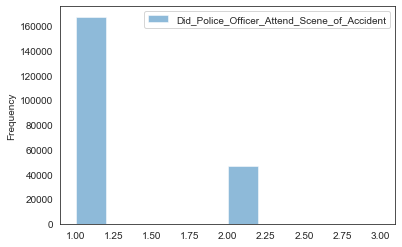

In [782]:
ax = df_veh_acc_cas[['Did_Police_Officer_Attend_Scene_of_Accident']].plot.hist(alpha=0.5)


In [783]:
len(df_veh_acc[df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident']==1])


154198

In [784]:
len(df_veh_acc[df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident']==2])


51410

In [785]:
len(df_veh_acc[df_veh_acc['Did_Police_Officer_Attend_Scene_of_Accident']==3])


16

* Encode the target variable
2, 3 -> 0


In [786]:
def encode_target(row):
    val = row[target_col]
    if val == 2 or val == 3:
        return 0
    
    return val


In [787]:
target_col = 'Did_Police_Officer_Attend_Scene_of_Accident'

cols = cat_cols + num_cols + [target_col]

df_model = df_veh_acc_cas[cols].copy()
df_model.shape


(214097, 48)

In [788]:
df_model[target_col] = df_model.apply(encode_target, axis=1)



In [789]:
df_model[target_col].value_counts(normalize=True)


1    0.781959
0    0.218041
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

In [790]:
df_model[target_col].value_counts(normalize=False)


1    167415
0     46682
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

## Preparing the dataset into train and test sets


In [812]:
X = df_model.drop([target_col], axis=1)
Y = df_model[[target_col]]


### Handle missing values


In [813]:
for col in X.columns:
    if X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(0)


In [814]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)


### Remove highly correlated features

In [815]:
df_temp = pd.concat([X_train, y_train], axis=1)

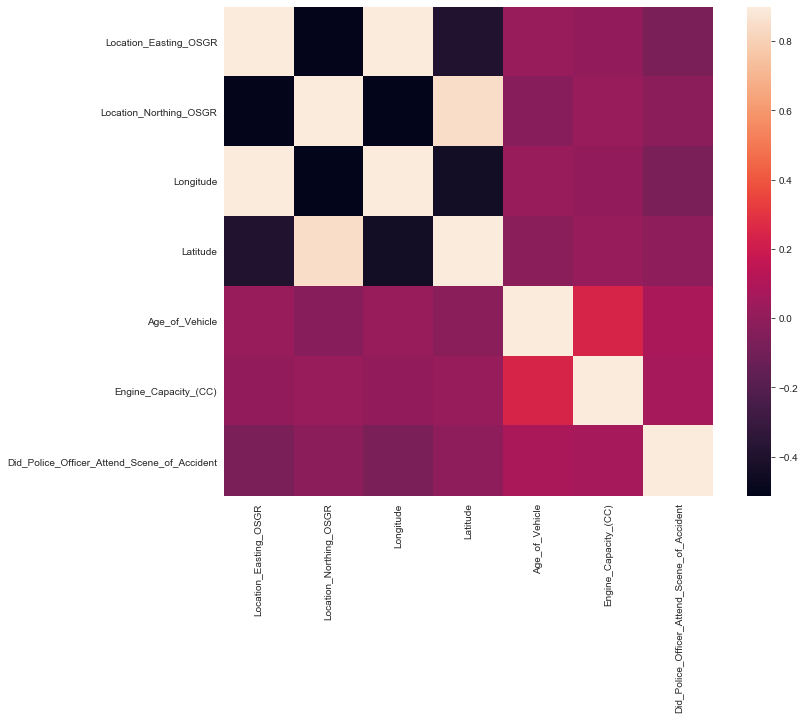

In [816]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_temp.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


It shows that 'Location_Easting_OSGR' is highly correlated to 'Longitude', 'Location_Northing_OSGR' is highly correlated to 'Latitude'. Therefore, 'Location_Easting_OSGR' and 'Location_Northing_OSGR' will be removed.


In [817]:
X_train.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR'], inplace=True)
X_test.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR'], inplace=True)


## Evaluating machine learning models


### RandomForest


* **Precision, Recall, F1-score**

In [820]:

model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

report_rf = classification_report(y_test, y_pred_rf)

print(report_rf)


              precision    recall  f1-score   support

           0       0.86      0.64      0.73      9248
           1       0.91      0.97      0.94     33572

    accuracy                           0.90     42820
   macro avg       0.89      0.81      0.84     42820
weighted avg       0.90      0.90      0.89     42820



In [821]:
# 'f1_macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

cross_val_score(model_rf, X_train, y_train, scoring='f1_macro', n_jobs=-1, cv=3)
#cross_val_score(model_rf, X_train, y_train, n_jobs=-1, cv=3)



array([0.81343236, 0.81511603, 0.81143046])

* **Confusion matrix**

In [822]:
def plot_confusion_matrix(y_test, y_preds, class_names, columns=['Attend', 'Not Attend']):
    matrix = confusion_matrix(y_test, y_preds)

    #class_names = df_model.Did_Police_Officer_Attend_Scene_of_Accident.values
    dataframe = pd.DataFrame(matrix, index=columns, 
                             columns=columns)

    # create heatmap
    sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
    plt.show()
    

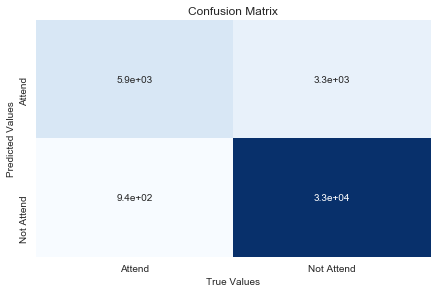

In [823]:
plot_confusion_matrix(y_test, y_pred_rf, df_model[target_col].values)


* **Compute the probability of a police officer attending the accident or not.**


In [824]:
y_pred_prob_rf = model_rf.predict_proba(X_test)


In [825]:
y_pred_prob_rf


array([[0.05, 0.95],
       [0.02, 0.98],
       [0.08, 0.92],
       ...,
       [0.02, 0.98],
       [0.39, 0.61],
       [0.05, 0.95]])

* **Precision-Recall curve**


Reference

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py


https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/



In [826]:
def plot_precision_recall_curve(y_test, y_pred_prob, classifier_name):
    average_precision = average_precision_score(y_test, y_pred_prob)
    average_precision = round(average_precision, 3)
    print('Average precision-recall score: {}'.format(average_precision))

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    print('Thresholds')
    print(thresholds)
    
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve ({}): AP={}'.format(classifier_name, average_precision))
    

Average precision-recall score: 0.983
Thresholds
[0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19
 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33
 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47
 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61
 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75
 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


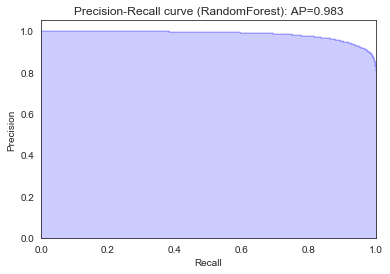

In [827]:
plot_precision_recall_curve(y_test, y_pred_prob_rf[:,-1], 'RandomForest')


* **ROC curve**


Reference

https://www.kaggle.com/learn-forum/53782

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/



In [828]:
def plot_roc_curve(y_test, y_pred_prob, classifier_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    roc_auc = auc(fpr, tpr)
    roc_auc = round(roc_auc, 3)
    plt.figure(figsize=(8,8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {})'.format(classifier_name, roc_auc))


    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve ({})'.format(classifier_name), fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    

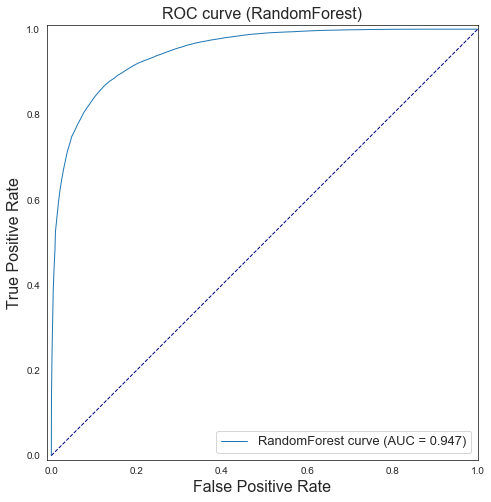

In [829]:
plot_roc_curve(y_test, y_pred_prob_rf[:,-1], 'RandomForest')


**Note**

- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.


- Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.


- ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

I put roc curve here just for reference. For this task, we should use precision recall curve to monitor the performance.


**Reference**


https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


### LightGBM


In [842]:
model_lgb = lgbm.LGBMClassifier()

model_lgb.fit(X_train, y_train)

y_pred_lgb = model_lgb.predict(X_test)

report_lgb = classification_report(y_test, y_pred_lgb)

print(report_lgb)


              precision    recall  f1-score   support

           0       0.77      0.55      0.64      9248
           1       0.88      0.95      0.92     33572

    accuracy                           0.87     42820
   macro avg       0.83      0.75      0.78     42820
weighted avg       0.86      0.87      0.86     42820



In [843]:
cross_val_score(model_lgb, X_train, y_train, scoring='f1_macro', n_jobs=-1, cv=3)


array([0.76668606, 0.765211  , 0.76239259])

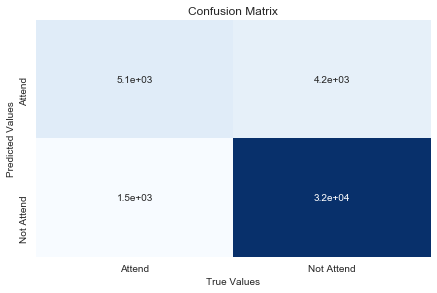

In [844]:
plot_confusion_matrix(y_test, y_pred_lgb, df_model[target_col].values)


In [845]:
y_pred_prob_lgb = model_lgb.predict_proba(X_test)


Average precision-recall score: 0.97
Thresholds
[0.01040789 0.01053108 0.01055572 ... 0.99898966 0.99901496 0.99901889]


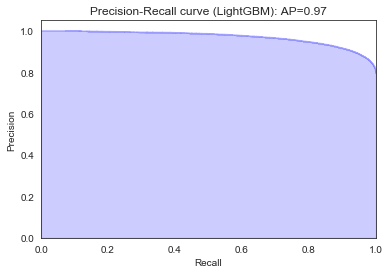

In [846]:
plot_precision_recall_curve(y_test, y_pred_prob_lgb[:,-1], 'LightGBM')


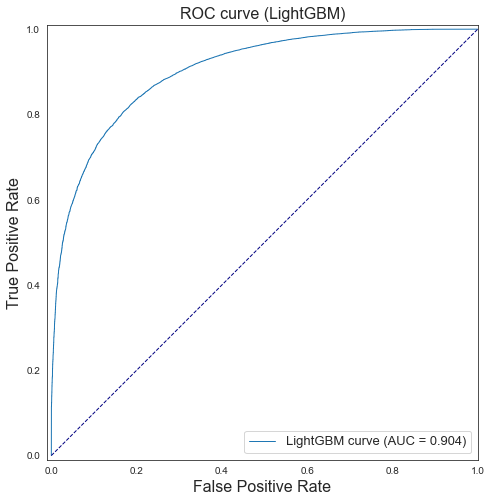

In [847]:
plot_roc_curve(y_test, y_pred_prob_lgb[:,-1], 'LightGBM')


### Hyperparameter tuning


**Reference**

https://lightgbm.readthedocs.io/en/latest/Parameters.html

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html


In [848]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

In [ ]:
# https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823

params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}


gridParams = {
    'learning_rate': [0.005, 0.01, 0.1],
    'n_estimators': [40, 100, 500, 1000, 2000],
    'num_leaves': [6, 8, 12, 16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.2, 0.7, 0.9],
    'reg_alpha' : [0.5, 1, 1.2],
    'reg_lambda' : [0.5, 1, 1.2, 1.4],
    }

mdl = lgbm.LGBMClassifier(boosting_type= 'gbdt',
                          objective = 'binary',
                          is_unbalance = True,
                          #metric = 'binary_logloss',
                          metric = 'auc',
                          n_jobs = 3, 
                          silent = True,
                          max_depth = params['max_depth'],
                          max_bin = params['max_bin'],
                          subsample_for_bin = params['subsample_for_bin'],
                          subsample = params['subsample'],
                          subsample_freq = params['subsample_freq'],
                          min_split_gain = params['min_split_gain'],
                          min_child_weight = params['min_child_weight'],
                          min_child_samples = params['min_child_samples'],
                          scale_pos_weight = params['scale_pos_weight'],
                        )

mdl.get_params().keys()

model_lgb_randomcv = RandomizedSearchCV(mdl, 
                                        gridParams,
                                        verbose=1,
                                        cv=3,
                                        n_jobs=2,)

model_lgb_randomcv.fit(X_train, y_train)

report(model_lgb_randomcv.cv_results_)

print("\n Best params:\n", model_lgb_randomcv.best_params_)
   


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
y_pred_lgb_randomcv = model_lgb_randomcv.predict(X_test)

y_pred_prob_lgb_randomcv = model_lgb_randomcv.predict_proba(X_test)

report_lgb_randomcv = classification_report(y_test, y_pred_lgb_randomcv)

print(report_lgb)


In [ ]:
plot_precision_recall_curve(y_test, y_pred_prob_lgb_randomcv[:,-1], 'LightGBM (RandomCV)')


In [ ]:
plot_roc_curve(y_test, y_pred_prob_lgb_randomcv[:,-1], 'LightGBM (RandomCV)')


### Stacking

In [266]:

y_pred_prob_stack = 0.7*y_pred_prob_lgb + 0.3*y_pred_prob_rf


Average precision-recall score: 0.866
Thresholds
[0.00225594 0.00225634 0.00225786 ... 0.9760981  0.98046481 0.98058577]


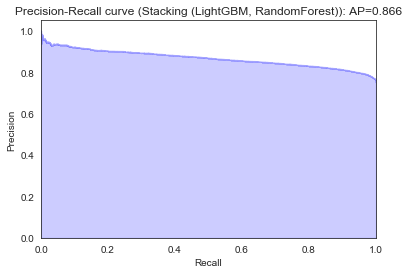

In [267]:
plot_precision_recall_curve(y_test, y_pred_prob_stack[:,-1], 'Stacking (LightGBM, RandomForest)')


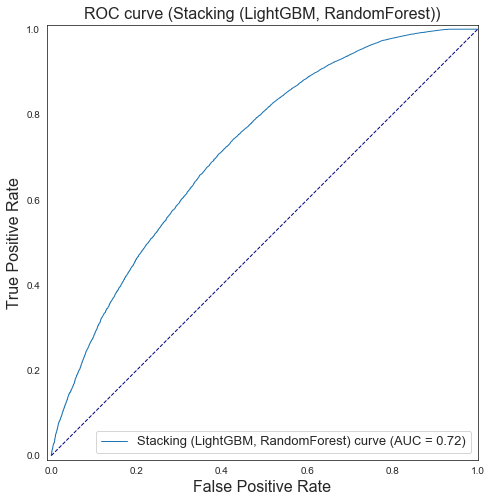

In [268]:
plot_roc_curve(y_test, y_pred_prob_stack[:,-1], 'Stacking (LightGBM, RandomForest)')


### SMOTE


**Reference**

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


In [269]:
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_train.values, y_train.values)
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)


In [273]:
#model_lgb_smote = lgbm.LGBMClassifier()
model_rf_smote = RandomForestClassifier(random_state=42, n_jobs=-1)

model_rf_smote.fit(X_resampled, y_resampled)

y_pred_rf_smote = model_rf_smote.predict(X_test)

y_pred_prob_rf_smote = model_rf_smote.predict_proba(X_test)

report_rf_smote = classification_report(y_test, y_pred_rf_smote)
print(report_rf_smote)


              precision    recall  f1-score   support

           0       0.76      0.19      0.30     10338
           1       0.78      0.98      0.87     30784

    accuracy                           0.78     41122
   macro avg       0.77      0.58      0.58     41122
weighted avg       0.78      0.78      0.73     41122



In [272]:
cross_val_score(model_lgb_smote, X_resampled, y_resampled, scoring='f1_macro', n_jobs=-1, cv=3)


array([0.55986523, 0.90579261, 0.90716481])

Average precision-recall score: 0.853
Thresholds
[0.00198898 0.00202909 0.00203377 ... 0.95630765 0.9568256  0.95964983]


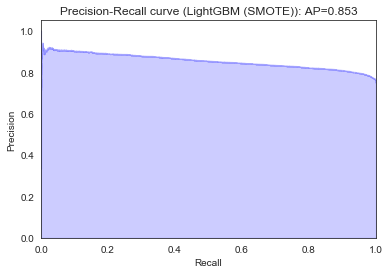

In [274]:
plot_precision_recall_curve(y_test, y_pred_prob_lgb_smote[:,-1], 'LightGBM (SMOTE)')


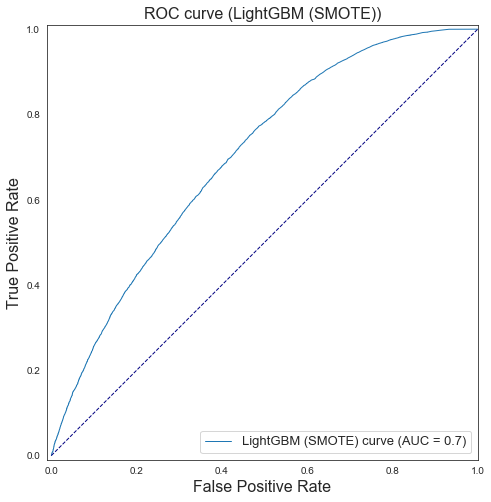

In [275]:
plot_roc_curve(y_test, y_pred_prob_lgb_smote[:,-1], 'LightGBM (SMOTE)')


### SHAP feature analysis


**Reference**

https://github.com/slundberg/shap


https://github.com/slundberg/shap/issues/367



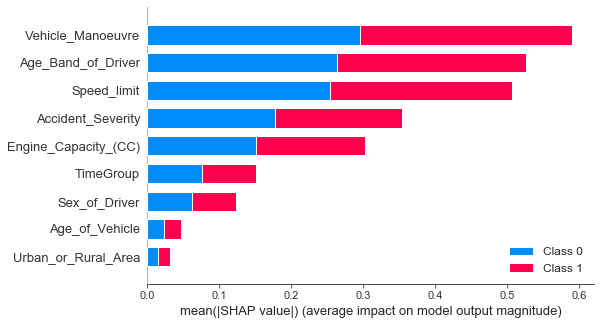

In [276]:
explainer = shap.TreeExplainer(model_lgb)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)



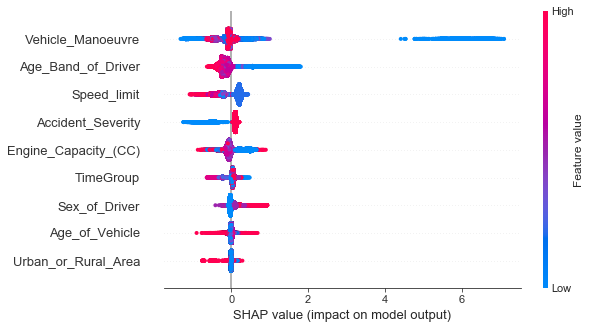

In [283]:
shap.summary_plot(shap_values[0], X_train)


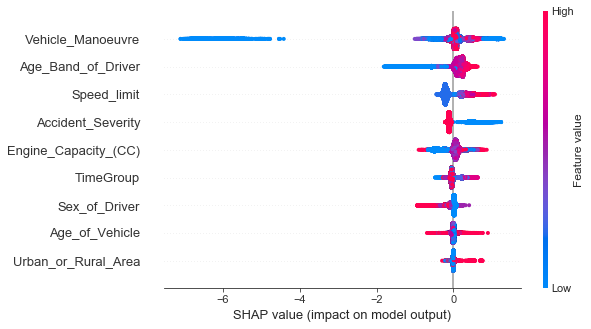

In [284]:
shap.summary_plot(shap_values[1], X_train)


# System Design


# Conclusion